In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [12]:
data = {
    'x': np.arange(1, 21),
    'y': np.array([0,1,0,1,0,1,0,1,0,0,1,0,1,1,1,0,1,1,0,1])
}
df = pd.DataFrame(data)
df

,x,y
0,1,0
1,2,1
2,3,0
3,4,1
4,5,0
5,6,1
6,7,0
7,8,1
8,9,0
9,10,0


In [13]:
from sklearn.linear_model import LogisticRegression
modelRR = LogisticRegression(solver='lbfgs')
modelRR.fit(df[['x']], df['y'])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [14]:
df['y log RR'] = modelRR.predict(df[['x']])
df

,x,y,y log RR
0,1,0,0
1,2,1,0
2,3,0,0
3,4,1,0
4,5,0,0
5,6,1,0
6,7,0,0
7,8,1,1
8,9,0,1
9,10,0,1


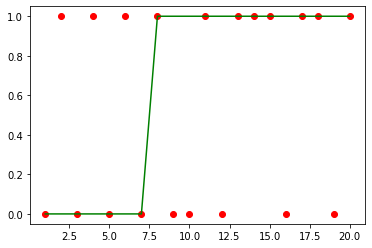

In [15]:
plt.plot(df['x'], df['y'], 'ro')
plt.plot(df['x'], df['y log RR'], 'g-')

Probability (y=1) $$ \frac {1} {1+ e^-(mx+c)} $$

In [16]:
m = modelRR.coef_[0][0]
c = modelRR.intercept_[0]
m, c

(0.07772303483403038, -0.6054813323746235)

In [19]:
#Probability
df['proba1'] = 1/ (1 + np.exp(-1*(m*df['x']+c)))
df['proba0'] = 1 - df['proba1']
df

,x,y,y log RR,proba1,proba0
0,1,0,0,0.371040,0.628960
1,2,1,0,0.389352,0.610648
2,3,0,0,0.407982,0.592018
3,4,1,0,0.426881,0.573119
4,5,0,0,0.445995,0.554005
5,6,1,0,0.465270,0.534730
6,7,0,0,0.484650,0.515350
7,8,1,1,0.504076,0.495924
8,9,0,1,0.523489,0.476511
9,10,0,1,0.542832,0.457168


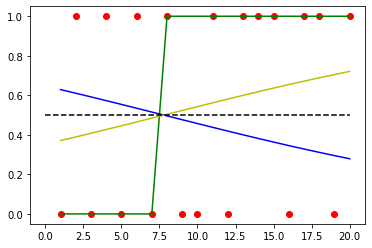

In [25]:
plt.plot(df['x'], df['y'], 'ro')
plt.plot(df['x'], df['y log RR'], 'g-')
plt.plot(df['x'], df['proba0'], 'b-')
plt.plot(df['x'], df['proba1'], 'y-')
plt.plot([0,20],[0.5,0.5], 'k--')


In [26]:
modelRR.predict_proba(df[['x']])

array([[0.62896012, 0.37103988],
       [0.61064762, 0.38935238],
       [0.59201758, 0.40798242],
       [0.57311927, 0.42688073],
       [0.55400505, 0.44599495],
       [0.53472977, 0.46527023],
       [0.5153502 , 0.4846498 ],
       [0.49592435, 0.50407565],
       [0.47651081, 0.52348919],
       [0.45716798, 0.54283202],
       [0.43795345, 0.56204655],
       [0.41892326, 0.58107674],
       [0.40013128, 0.59986872],
       [0.38162865, 0.61837135],
       [0.3634632 , 0.6365368 ],
       [0.34567905, 0.65432095],
       [0.32831626, 0.67168374],
       [0.31141051, 0.68858949],
       [0.29499295, 0.70500705],
       [0.27909013, 0.72090987]])

In [28]:
df['proba1 pred'] = modelRR.predict_proba(df[['x']])[:,1]
df['proba0 pred'] = modelRR.predict_proba(df[['x']])[:,0]
df

,x,y,y log RR,proba1,proba0,proba1 pred,proba0 pred
0,1,0,0,0.371040,0.628960,0.371040,0.628960
1,2,1,0,0.389352,0.610648,0.389352,0.610648
2,3,0,0,0.407982,0.592018,0.407982,0.592018
3,4,1,0,0.426881,0.573119,0.426881,0.573119
4,5,0,0,0.445995,0.554005,0.445995,0.554005
5,6,1,0,0.465270,0.534730,0.465270,0.534730
6,7,0,0,0.484650,0.515350,0.484650,0.515350
7,8,1,1,0.504076,0.495924,0.504076,0.495924
8,9,0,1,0.523489,0.476511,0.523489,0.476511
9,10,0,1,0.542832,0.457168,0.542832,0.457168


In [34]:
#prediksi y threshold 0.65
df['y 0.65'] = df['proba1'].apply(lambda x: 1 if (x>0.65) else 0)
df = df.drop(['proba1 0.65'], axis=1)
df

,x,y,y log RR,proba1,proba0,proba1 pred,proba0 pred,y 0.65
0,1,0,0,0.371040,0.628960,0.371040,0.628960,0
1,2,1,0,0.389352,0.610648,0.389352,0.610648,0
2,3,0,0,0.407982,0.592018,0.407982,0.592018,0
3,4,1,0,0.426881,0.573119,0.426881,0.573119,0
4,5,0,0,0.445995,0.554005,0.445995,0.554005,0
5,6,1,0,0.465270,0.534730,0.465270,0.534730,0
6,7,0,0,0.484650,0.515350,0.484650,0.515350,0
7,8,1,1,0.504076,0.495924,0.504076,0.495924,0
8,9,0,1,0.523489,0.476511,0.523489,0.476511,0
9,10,0,1,0.542832,0.457168,0.542832,0.457168,0
